<img src="images/Picture0.png" width=200x />

# Notebook 01b - Data Wrangling - Supplement

## Instructions
...

## Pre-requisites
...

## Credits
...


## If you are using Colab, save a copy of this notebook!!

Before we get started, it is crucially important that you **save a copy of the notebook** to a local folder if you are accessing this notebook in Google Colab! Please go to:

```
File -> Make a copy
```

### Checking a package is installed

Prior to attempting to use a package, make sure it is present within the relevant Python environment setup.


In [ ]:
import sys

'pandas' in sys.modules

False

## Importing a package

There are three ways to enable features in a Python-package:

- `import pandas`
   - all sub-modules and functions in the pandas module are accessible with `pandas.*`
   - e.g: `pandas.DataFrame({'A': 1.})`
- `import pandas as pd`,
   - create an alias for the namespace yielding methods being accessed by `pd.*`
   - e.g: `pd.DataFrame({'A': 1.})`
- `from pandas import *`
   - all functions will be loaded into the local namespace.
   - e.g: `DataFrame({'A': 1.})`

## More Series Details

In [ ]:
import pandas as pd

# Create a list of cities
cities_list = [
  'Champaign', 'Chicago', 'Springfield',
  'Elmhurst', 'Bloomington', 'Iowa City',
  'St. Louis', 'West Lafayette', 'Baltimore',
  'Newark', 'College Park']

# Construct series from list
cities_series = pd.Series(cities_list)

# Show output
print(cities_series)

0          Champaign
1            Chicago
2        Springfield
3           Elmhurst
4        Bloomington
5          Iowa City
6          St. Louis
7     West Lafayette
8          Baltimore
9             Newark
10      College Park
dtype: object


When grouping values under a series, it is helpful to provide an explanation of what is being contained within the series. We can associate a name to each series by using the member variable `.name`

In [ ]:

cities_series.name = 'City Names'
cities_series

Notice, the index is numeric. We can change how indexes are formed by supplying our own indices during the creation.

In [ ]:
# Add custom indices
cities_series_alpha_idx = pd.Series(
 cities_list, index = ['a','c','b', 'f', 'g', 'e', 'z', 'y', 'q', 'v', 'r']
)

print(cities_series_alpha_idx)

### Lambda Functions

In [ ]:
# Read in Data
uci_adult_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
     sep = ",",
     names= ['age', 'workclass', 'fnlwgt', 'education', 'educationNum','maritalStatus',
             'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek','nativeCountry',
             'income'],
     na_values = ['NA','?']
  )

We want to create a "HighEarnerWorker" variable that quantifies the amount earned based on the captial gain multiplied by hours per week. We could do something like the following:

In [ ]:
uci_adult_df['HighEarnerWorker'] = uci_adult_df.hoursPerWeek * uci_adult_df.capitalGain

Alternatively, we can use a lambda function to handle the mapping. Lambda functions are anonymous functions meant for single-use. They take the form of:

```python
(lambda parameters: expression)(input)
```

As an example, consider the squaring operation, we could use: $$f(x) = x^2$$


In [ ]:
(lambda x: x**2)(4)

In [ ]:
(lambda x: x**2)(8)

The equivalent function definition would be:


In [ ]:
def square_value(x):
  return x**2

square_value(8)

If we find ourselves frequently using the squaring lambda function, we can quickly promote it by assigning a name.


In [ ]:
square_value = (lambda x: x**2)
square_value(8)

Returning to adding a `HighEarnerWorker`, we could use the `lambda` function alongside of `.assign()` method.

In [ ]:
uci_adult_df.assign(HighEarnerWorker = lambda df: df.hoursPerWeek * df.capitalGain)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,HighEarnerWorker
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,86960
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


### Your Turn: Understanding Lambdas

Previously, we established two version for adding a column:

```python
# Direct manipulation
uci_adult_df['HighEarnerWorker'] = uci_adult_df.hoursPerWeek*uci_adult_df.capitalGain

# Lambda function equivalent
uci_adult_df.assign(HighEarnerWorker=lambda df: df.hoursPerWeek*df.capitalGain)
```

What benefit does the `lambda` version provided compared to a direct modification?

## Drop Columns

Sometimes a column doesn't make sense to belong to a `DataFrame`. The column can be removed using `.drop()`.

**Note:** We're using `inplace=True` to avoid making a copy and needing to re-save it back into the original `DataFrame` object.



In [ ]:
print("Variables before drop:")
print(uci_adult_df.columns[0:4])

# Drop a variable inplace
uci_adult_df.drop(labels= 'fnlwgt', axis = 1, inplace=True)

print("Variables after drop:")
print(uci_adult_df.columns[0:4])

Variables before drop:
Index(['age', 'workclass', 'fnlwgt', 'education'], dtype='object')
Variables after drop:
Index(['age', 'workclass', 'education', 'educationNum'], dtype='object')


## Add Columns

Sometimes we may wish to derive a new variable from the data. Derived variables exist in many forms, a few common instances are:

- Computing new quantities (e.g. overall wage when given hours worked and pay rate).
- **Discretize** continuous values into a discrete scale (e.g. 100 - 90 -> A, 80 - 89 -> B)
- **Normalize** continuous values by applying a linear transformation to scale and center data.

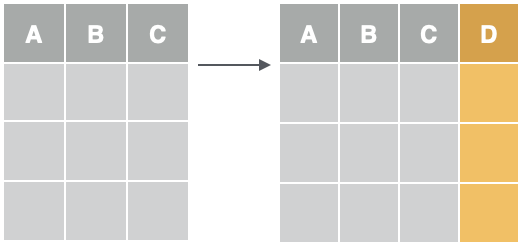

## Aggregating by Groups


Many times will seek to obtain summary information on a per-group basis. For instance, we want to know the average hours worked for each age in the data set.

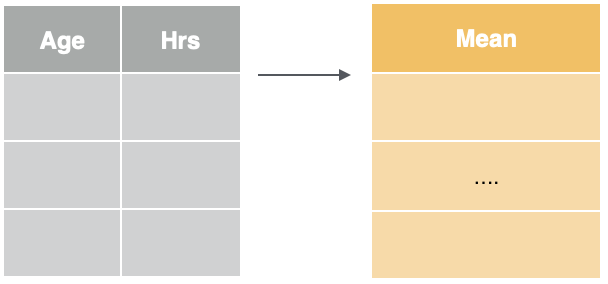

In [ ]:
hrs_by_age_mean = uci_adult_df.groupby('age')['hoursPerWeek'].mean()
print(hrs_by_age_mean)

age
17    21.367089
18    25.912727
19    30.678371
20    32.280212
21    34.034722
        ...    
85    29.333333
86    40.000000
87     2.000000
88    40.000000
90    36.813953
Name: hoursPerWeek, Length: 73, dtype: float64


Sometimes, it's useful to have the information in dictionary form. To obtain, use `.to_dict()`.

In [ ]:
hrs_by_age_mean.to_dict()

## Custom Aggregations

Additional aggregation information can be obtain by using `.agg()` and supplying summary functions.

In [ ]:
hrs_by_age_overview = uci_adult_df.groupby('age')['hoursPerWeek'].agg(['mean', 'std', 'count'])
display(hrs_by_age_overview)

## Graphing Data

Frequently, we may be interested in visually seeing distribution information about the data. As a result, `pandas` has built-in methods to faciliate visualizing information.

Histograms are useful for this approach as they focus on continuous variable binning.

In [ ]:
# Plot a histogram for Age
uci_adult_df.hist('age')

Note, we can suppress the excess information by adding a `;` to the end of the statement.

In [ ]:
# Plot a histogram for Age
uci_adult_df.hist('age');

Boxplots are useful for showing a continuous variable split by discrete categories.

In [ ]:
uci_adult_df.boxplot('age', by = 'race');

In [ ]:
uci_adult_df.plot.scatter('age', 'hoursPerWeek');

### Your Turn: Plotting

Generate a histogram plot of `hoursPerWeek`

In [ ]:
# Plot histogram of `hoursPerWeek`


### Excel

Many data sets will not be in CSV form or delimited form. Instead, they likely will be found in Excel or in another form. In the event that arises, please note that `pandas` is able to easily read in such data.

Many analysts will be tempted to immediately read in an excel file using `.read_excel()`.

In [ ]:
url = "https://github.com/inmas-training/fa21-statistical-methods-workshop/raw/main/data/subject_heights.xlsx"
df = pd.read_excel(url, None);

Unfortunately, Excel files may have multiple worksheets embedded in them. Going this route would load all of the spreadsheet information.

In [ ]:
# See dictionaries read in
df.keys()

dict_keys(['subject_data', 'enrollment'])

Sometimes, only one worksheet is required. So, we opt to first look at the spreadsheet information.

In [ ]:
# Setup an object that points to the excel data
xl_overview = pd.ExcelFile(url)

# See all worksheets
sheets = xl_overview.sheet_names

print(sheets)

['subject_data', 'enrollment']


Next, let's selectively obtain the `subject_data` spreadsheet:

In [ ]:
# Obtain a specific worksheet
my_subject_data = xl_overview.parse('subject_data')
display(my_subject_data)

,id,sex,height
0,1,M,6.100000
1,2,F,5.500000
2,3,F,5.200000
3,4,M,4.231190
4,5,M,6.228084
5,6,M,4.380299
6,7,F,5.238986
7,8,M,7.545489
8,9,F,4.887789
9,10,F,4.760574


### Your Turn: Plotting

Generate a boxplot plot of `height` by `sex`.